# Long short-term Memory (LSTM) and Keras
*Disclaimer: Information seen from this tutorial should not be seen as stock advice*

## Background on RNNs
Before any discussion of LSTM, we must introduce the notion of a recurrent neural network (RNN). The commonly thought of artificial neural network is of the feedforward variety, where the output of a layer depends only on the input, i.e. each unit is memoryless. RNNs, on the other hand, are cyclic in nature, where the output of a layer depends on both the current input and the previous inputs to the layer. Each unit of a recurrent layer maintains a hidden state, which updates on every input to the unit. 

RNNs are useful for applications for which outputs may be influenced not only by the current input, but also by past inputs. Some of the more popular applications of RNNs are in natural language processing (NLP). For example, in the case of, say, the NLP task of text summarization. Here, we feed in a long article and would like a shorter summary.  The summary words are generated as a function of both the current text word, and the set of text words that have already be seen. In the data science world, RNNs have applications in time-dependent datasets such as, for example, stock price datasets. 

### The inner workings of a traditional RNN unit
The layers of an RNN have a simple update methodology. We compute the new hidden state of the recurrent node by computing the dot products of an update weight with the current hidden state and an input weight with the input, and adding them together. We take the hyperbolic tangent of this to bring the value to between -1 and 1. 

## LSTM 
Long short-term memory (LSTM) is one type of unit that can make up an RNN. Normal RNNs otherwise do not specify *how*  to remember the information. The LSTM gives some control in remembering information from longer ago. Again going back to the text summarization example, an LSTM can generate a summary word based on text words that were seen paragraphs ago. 

### The inner workings of an LSTM unit
LSTMs essentially add more functionality to the traditional RNN unit. In addition to remembering the hidden cell state from the last time that the unit was evaluated, we also remember the last output that the cell produced. 

Call the hidden cell state $C_{t-1}$, and the last output $h_{t-1}$. Call the input $x_t$. In the following sections, any variable denoted $W$ is a learned weights matrix, and any variable denoted $b$ is a learned bias vector. 

#### How much to remember, how much to forget - the forget gate
We pass the output of the last state, h<sub>t-1</sub> concatenated with the input, through a process commonly used in neural networks; we multiply this vector with a weights matrix, then pass this result through the sigmoid function to determine how much the old cell state should affect the new cell state. 

$f = \sigma(W_f (h_{t-1} + x_t) + b_f)$

We'll later pointwise multipy this vector by the old cell state to "remember" certain elements of the old cell state and forget the rest. 


#### Adding new information - the input gate
The current input also determines the value of the new cell state, as well as the output. We now compute the sigmoid and the hyperbolic tangent of the input/last output vector, passed through separate simple neural networks. In more succint terms, we compute i and CT as follows:
  * $i = \sigma(W_i (h_{t-1} + x_t) + b_i)$
  * $CT = \tanh(W_{CT} (h_{t-1} + x_t) + b_{CT})$
  
We pointwise multiply these two vectors together to form the vector CL:
  * $CL = i \cdot CT$

#### Combining to form new cell state and output
We first compute the new cell state by comibining the results of the forget gate and the input gate as follows. Remember that f is the value computed by the forget gate, and CL is the value computed by the input gate.
  * $C_t = f \cdot C_{t-1} + CL$

Using this new cell state, we can compute the output value of the unit. We pass our input/last output vector through yet another simple neural network, and take the sigmoid. We pointwise multiply this with the hyperbolic tangent of the new, current cell state to form the output, as follows:
  * $h_t = \sigma(W_o (h_{t-1} + x_t) + b_o) \cdot \tanh(C_t)$

#### Summary
The following image, from [Shi Yan's blog](https://medium.com/mlreview/understanding-lstm-and-its-diagrams-37e2f46f1714) does a good job of showing the interactions visually; the multiplication operators are pointwise multiplications on the vectors. 

<img src='LSTM_SY.png'>

## Keras
Now that we have some background on LSTM, let's begin a fun exercise with them! Instead of coding up an LSTM network manually, we'll use the Keras deep learning library. Keras is a powerful machine learning library for Python, which adds a layer of abstraction between the user and deep learning libraries such as TensorFlow. We'll begin by installing the TensorFlow backend which Keras will use, as well as Keras itself! Open up a terminal and run the following commands.
```
$ pip install tensorflow
$ pip install keras 
```

Let's begin by writing a very simple neural network in Keras. We essentially define a combinational Boolean logic function which takes a 4-bit input and returns a 1-bit output. 

Let's begin with the first step - forming the model itself. We use the Keras Sequential model, and add our layers to that. First we add a single densely connected layer, which Keras calls Dense; by specifying the input dimension as a parameter, we can essenetially also define an input layer. We specify the number of units as 10. We then add a single output layer by adding another Dense layer composed of one unit. Finally we compile the model, specifying how it should be evaluated (in this case, stochastic gradient descent on the mean squared error). 

In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from random import randint

model = Sequential()
model.add(Dense(10, activation='sigmoid', input_dim=4))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='sgd')

Using TensorFlow backend.


Now we produce a simple, sample training and test dataset. This is essentially a 4-bit input, 1-bit output Boolean function. We divide the set into a training set and a test set.

In [2]:
x_arr = [
    [0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0],
    [0,1,0,1],[0,1,1,0],[0,1,0,1],[0,1,1,0],[0,1,1,1],
    [1,0,0,0],[1,0,0,1],[1,0,1,0],[1,0,1,1],[1,1,0,0],
    [1,1,0,1],[1,1,1,0],[1,1,0,1],[1,1,1,0],[1,1,1,1],
]

y_arr = []
for x in x_arr:
    y = randint(0,1)
    y_arr.append([y])

x_train = []
y_train = []
x_test = []
y_test = []
for i in range(len(x_arr)):
    if i % 2 == 0 or i % 3 == 0:
        x_train.append(x_arr[i])
        y_train.append(y_arr[i])
    else:
        x_test.append(x_arr[i])
        y_test.append(y_arr[i])

Finally, we train the model with a call to model.fit, with 100 epochs here. The call to model.evaluate will test the data on the test data that we prepared in the cell above. 

In [3]:
model.fit(np.array(x_train), np.array(y_train), epochs=100, verbose=1)

e = model.evaluate(np.array(x_test), np.array(y_test), verbose=1)
print("Evaluation error: ")
print(e)


Epoch 1/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3387
Epoch 2/100
13/13 [==============================] - 0s 79us/step - loss: 0.3382
Epoch 3/100
13/13 [==============================] - 0s 107us/step - loss: 0.3376
Epoch 4/100
13/13 [==============================] - 0s 104us/step - loss: 0.3371
Epoch 5/100
13/13 [==============================] - 0s 90us/step - loss: 0.3365
Epoch 6/100
13/13 [==============================] - 0s 78us/step - loss: 0.3360
Epoch 7/100
13/13 [==============================] - 0s 71us/step - loss: 0.3354
Epoch 8/100
13/13 [==============================] - 0s 107us/step - loss: 0.3349
Epoch 9/100
13/13 [==============================] - 0s 72us/step - loss: 0.3344
Epoch 10/100
13/13 [==============================] - 0s 68us/step - loss: 0.3338
Epoch 11/100
13/13 [==============================] - 0s 72us/step - loss: 0.3333
Epoch 12/100
13/13 [==============================] - 0s 104us/step - loss: 0.3328
Epoch 13/100
13/13 [==

7/7 [==============================] - 0s 2ms/step
Evaluation error: 
0.295338898897


And just like that, we have a simple neural network! Keras makes it so that users do not have to worry about the implementation of the inner workings of the network, and can focus on the overall architecture of the network instead.

## LSTM in Keras
Now we will implement an LSTM network in the Keras environment. Unlike the simple example that we did above, we will use a more legitimate dataset. One example application where LSTM networks may be useful in the data science world is in time series prediction. One such example is in stock price prediction. While it is difficult to see just based on the current stock price, what the stock price will be tomorrow, it is possible that there the recent trend of the stock price can determine what the price will be tomorrow! We will use the value of the S&P 500 Index as an indicator of stock prices. 

### Collecting the Data
Data was collected from Yahoo! Finance's Historical Data on the S&P 500 Index - reporting data for every day since January 3, 1950. For simplicity, we use only the closing price from the previous day to determine the price today. We'll split the data up into a training set and a testing set. The training set will be the first 14718 (exactly 6/7 of the full set) rows. 

In [4]:
import pandas as pd

full_df = pd.read_csv('GSPC.csv')
close_df = full_df['Close']

train = (close_df.copy())[:14718]
test = (close_df.copy())[14718:]


### Preparing the Data
We now construct the $X$ and $Y$ for both the training and the test set. The first thing that we will do is min-max scale the data, so that the raw inputs do not become biased by the activation sigmoid and hyperbolic tangent functions. 

The value for any row in $Y$ is the value of $X$ at the next index. This makes sense, as we are attempting to predict the next day's closing price based, with the new information input being today's closing price. Thus, $Y_t = X_{t+1}$. We remove the last row from both $X$ and $Y$, as we now have one less $Y$ element than $X$ elements. 

In [5]:
from sklearn.preprocessing import MinMaxScaler
def constructXY(data): 
    X_df = data.copy()
    Y_df = data.copy()
    Y_df = Y_df[1:]
    
    X_df = X_df[:-1]
    
    return (X_df, Y_df)

train_data = train.values
test_data = test.values

train_mms = MinMaxScaler(feature_range=(0,1))
test_mms = MinMaxScaler(feature_range=(0,1))

train_data = np.reshape(train_data, (len(train_data),1))
test_data = np.reshape(test_data, (len(test_data),1))

train_data = train_mms.fit_transform(train_data)
test_data = test_mms.fit_transform(test_data)

X_train,Y_train = constructXY(train_data)
X_test,Y_test = constructXY(test_data)

X_train = np.reshape(X_train, (X_train.shape[0],1))
X_test = np.reshape(X_test, (X_test.shape[0],1))

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


### Constructing an LSTM network
We'll use Keras like we did with the simple neural network to construct an LSTM network. This network will be composed of the usual input layer, an LSTM layer, and an output Dense layer. We'll again use the mean squared error loss function, and stochastic gradient descent in the training phase.

In [6]:
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(20, input_shape=(1,1)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='sgd')
model.fit(X_train, Y_train, epochs=100, verbose=1)


Epoch 1/100
14717/14717 [==============================] - 1s 88us/step - loss: 0.0735
Epoch 2/100
14717/14717 [==============================] - 1s 65us/step - loss: 0.0593
Epoch 3/100
14717/14717 [==============================] - 1s 64us/step - loss: 0.0478
Epoch 4/100
14717/14717 [==============================] - 1s 67us/step - loss: 0.0369
Epoch 5/100
14717/14717 [==============================] - 1s 65us/step - loss: 0.0268
Epoch 6/100
14717/14717 [==============================] - 1s 68us/step - loss: 0.0183
Epoch 7/100
14717/14717 [==============================] - 1s 74us/step - loss: 0.0116
Epoch 8/100
14717/14717 [==============================] - 1s 68us/step - loss: 0.0069
Epoch 9/100
14717/14717 [==============================] - 1s 67us/step - loss: 0.0039
Epoch 10/100
14717/14717 [==============================] - 1s 68us/step - loss: 0.0021
Epoch 11/100
14717/14717 [==============================] - 1s 68us/step - loss: 0.0011
Epoch 12/100
14717/14717 [===============

14717/14717 [==============================] - 1s 57us/step - loss: 3.1219e-05
Epoch 91/100
14717/14717 [==============================] - 1s 58us/step - loss: 3.1115e-05
Epoch 92/100
14717/14717 [==============================] - 1s 62us/step - loss: 3.1001e-05
Epoch 93/100
14717/14717 [==============================] - 1s 61us/step - loss: 3.0908e-05
Epoch 94/100
14717/14717 [==============================] - 1s 58us/step - loss: 3.0804e-05
Epoch 95/100
14717/14717 [==============================] - 1s 55us/step - loss: 3.0694e-05
Epoch 96/100
14717/14717 [==============================] - 1s 55us/step - loss: 3.0607e-05
Epoch 97/100
14717/14717 [==============================] - 1s 55us/step - loss: 3.0502e-05
Epoch 98/100
14717/14717 [==============================] - 1s 57us/step - loss: 3.0405e-05
Epoch 99/100
14717/14717 [==============================] - 1s 59us/step - loss: 3.0313e-05
Epoch 100/100
14717/14717 [==============================] - 1s 57us/step - loss: 3.0213e-05


### Using the LSTM Network
Now that our model is trained on the training set, we will use the test set that we generated above to evaluate the model.

In [7]:
e = model.evaluate(X_test, Y_test, verbose=1)
print("Least squared error on test data:")
print(e)

2452/2452 [==============================] - 0s 45us/step
Least squared error on test data:
9.55397859964e-05


### Plotting our Predictions
We can now try to visualize how well the model did on the S&P 500 Index. First, we'll gather prediction data, and then use Matplotlib to plot the data.  

In [8]:
import matplotlib
matplotlib.use("svg")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0) # you should adjust this to fit your screen

2452/2452 [==============================] - 0s 17us/step
[   17.29689789    17.48102951    17.55854797 ...,  1281.86181641
  1277.51550293  1278.9921875 ]
[ 1266.23022461  1267.65283203  1256.73742676 ...,  2636.64916992
  2596.33862305  2589.60888672]


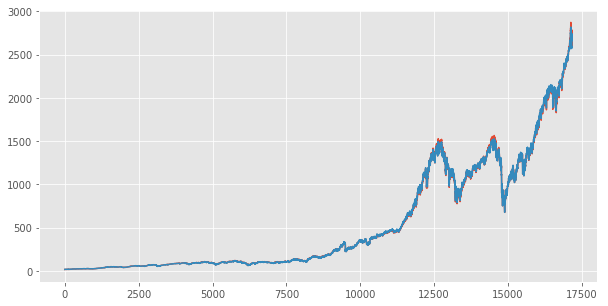

In [9]:
Y_pred_train = model.predict(X_train, verbose=1)
Y_pred_test = model.predict(X_test, verbose=1)

Y_pred_train = train_mms.inverse_transform(Y_pred_train)
Y_pred_test = test_mms.inverse_transform(Y_pred_test)

Y_pred_train = np.reshape(Y_pred_train, (len(Y_pred_train)))
Y_pred_test = np.reshape(Y_pred_test, (len(Y_pred_test)))

Y_pred = np.concatenate((Y_pred_train, Y_pred_test))

actual_data = close_df.values

plt.plot(actual_data)
plt.plot(Y_pred)
plt.show()

Now let's see what other set ups are possible. We set a lot of parameters in the Keras model, so how about we try and change some of those to see how things change. Let's try changing the number of epochs that the model trains for. We'll vary for 20, 50, 100, and 500 epochs. 

Epoch 1/20
14717/14717 [==============================] - 1s 84us/step - loss: 0.0732
Epoch 2/20
14717/14717 [==============================] - 1s 58us/step - loss: 0.0577
Epoch 3/20
14717/14717 [==============================] - 1s 58us/step - loss: 0.0456
Epoch 4/20
14717/14717 [==============================] - 1s 64us/step - loss: 0.0343
Epoch 5/20
14717/14717 [==============================] - 1s 64us/step - loss: 0.0243
Epoch 6/20
14717/14717 [==============================] - 1s 62us/step - loss: 0.0160
Epoch 7/20
14717/14717 [==============================] - 1s 59us/step - loss: 0.0099
Epoch 8/20
14717/14717 [==============================] - 1s 60us/step - loss: 0.0057
Epoch 9/20
14717/14717 [==============================] - 1s 59us/step - loss: 0.0031
Epoch 10/20
14717/14717 [==============================] - 1s 64us/step - loss: 0.0016
Epoch 11/20
14717/14717 [==============================] - 1s 58us/step - loss: 8.3215e-04
Epoch 12/20
14717/14717 [=======================

14717/14717 [==============================] - 1s 62us/step - loss: 3.2055e-05
Epoch 21/100
14717/14717 [==============================] - 1s 61us/step - loss: 3.1444e-05
Epoch 22/100
14717/14717 [==============================] - 1s 62us/step - loss: 3.1108e-05
Epoch 23/100
14717/14717 [==============================] - 1s 71us/step - loss: 3.0939e-05
Epoch 24/100
14717/14717 [==============================] - 1s 83us/step - loss: 3.0818e-05
Epoch 25/100
14717/14717 [==============================] - 1s 82us/step - loss: 3.0726e-05
Epoch 26/100
14717/14717 [==============================] - 2s 123us/step - loss: 3.0639e-05
Epoch 27/100
14717/14717 [==============================] - 2s 109us/step - loss: 3.0570e-05
Epoch 28/100
14717/14717 [==============================] - 1s 63us/step - loss: 3.0521e-05
Epoch 29/100
14717/14717 [==============================] - 1s 70us/step - loss: 3.0458e-05
Epoch 30/100
14717/14717 [==============================] - 1s 67us/step - loss: 3.0403e-05

14717/14717 [==============================] - 1s 62us/step - loss: 0.0043
Epoch 9/500
14717/14717 [==============================] - 1s 59us/step - loss: 0.0023
Epoch 10/500
14717/14717 [==============================] - 1s 59us/step - loss: 0.0012
Epoch 11/500
14717/14717 [==============================] - 1s 59us/step - loss: 6.3652e-04
Epoch 12/500
14717/14717 [==============================] - 1s 60us/step - loss: 3.3595e-04
Epoch 13/500
14717/14717 [==============================] - 1s 60us/step - loss: 1.8632e-04
Epoch 14/500
14717/14717 [==============================] - 1s 60us/step - loss: 1.1363e-04
Epoch 15/500
14717/14717 [==============================] - 1s 59us/step - loss: 7.8710e-05
Epoch 16/500
14717/14717 [==============================] - 1s 60us/step - loss: 6.2074e-05
Epoch 17/500
14717/14717 [==============================] - 1s 62us/step - loss: 5.4161e-05
Epoch 18/500
14717/14717 [==============================] - 1s 76us/step - loss: 5.0353e-05
Epoch 19/500
1

Epoch 97/500
14717/14717 [==============================] - 1s 63us/step - loss: 3.7358e-05
Epoch 98/500
14717/14717 [==============================] - 1s 64us/step - loss: 3.7266e-05
Epoch 99/500
14717/14717 [==============================] - 1s 65us/step - loss: 3.7156e-05
Epoch 100/500
14717/14717 [==============================] - 1s 67us/step - loss: 3.7070e-05
Epoch 101/500
14717/14717 [==============================] - 1s 67us/step - loss: 3.6973e-05
Epoch 102/500
14717/14717 [==============================] - 1s 61us/step - loss: 3.6873e-05
Epoch 103/500
14717/14717 [==============================] - 1s 54us/step - loss: 3.6780e-05
Epoch 104/500
14717/14717 [==============================] - 1s 56us/step - loss: 3.6688e-05
Epoch 105/500
14717/14717 [==============================] - 1s 66us/step - loss: 3.6597e-05
Epoch 106/500
14717/14717 [==============================] - 1s 92us/step - loss: 3.6494e-05
Epoch 107/500
14717/14717 [==============================] - 1s 64us/step

Epoch 185/500
14717/14717 [==============================] - 1s 63us/step - loss: 3.0437e-05
Epoch 186/500
14717/14717 [==============================] - 1s 66us/step - loss: 3.0364e-05
Epoch 187/500
14717/14717 [==============================] - 1s 62us/step - loss: 3.0307e-05
Epoch 188/500
14717/14717 [==============================] - 1s 60us/step - loss: 3.0243e-05
Epoch 189/500
14717/14717 [==============================] - 1s 60us/step - loss: 3.0194e-05
Epoch 190/500
14717/14717 [==============================] - 1s 63us/step - loss: 3.0131e-05
Epoch 191/500
14717/14717 [==============================] - 1s 64us/step - loss: 3.0070e-05
Epoch 192/500
14717/14717 [==============================] - 1s 67us/step - loss: 3.0008e-05
Epoch 193/500
14717/14717 [==============================] - 1s 57us/step - loss: 2.9946e-05
Epoch 194/500
14717/14717 [==============================] - 1s 64us/step - loss: 2.9894e-05
Epoch 195/500
14717/14717 [==============================] - 1s 61us/s

14717/14717 [==============================] - 1s 58us/step - loss: 2.6054e-05
Epoch 274/500
14717/14717 [==============================] - 1s 60us/step - loss: 2.6021e-05
Epoch 275/500
14717/14717 [==============================] - 1s 58us/step - loss: 2.5984e-05
Epoch 276/500
14717/14717 [==============================] - 1s 61us/step - loss: 2.5940e-05
Epoch 277/500
14717/14717 [==============================] - 1s 63us/step - loss: 2.5908e-05
Epoch 278/500
14717/14717 [==============================] - 1s 59us/step - loss: 2.5868e-05
Epoch 279/500
14717/14717 [==============================] - 1s 62us/step - loss: 2.5818e-05
Epoch 280/500
14717/14717 [==============================] - 1s 62us/step - loss: 2.5788e-05
Epoch 281/500
14717/14717 [==============================] - 1s 62us/step - loss: 2.5758e-05
Epoch 282/500
14717/14717 [==============================] - 1s 69us/step - loss: 2.5709e-05
Epoch 283/500
14717/14717 [==============================] - 1s 56us/step - loss: 2.

14717/14717 [==============================] - 1s 65us/step - loss: 2.3248e-05
Epoch 362/500
14717/14717 [==============================] - 1s 66us/step - loss: 2.3208e-05
Epoch 363/500
14717/14717 [==============================] - 1s 68us/step - loss: 2.3193e-05
Epoch 364/500
14717/14717 [==============================] - 1s 61us/step - loss: 2.3162e-05
Epoch 365/500
14717/14717 [==============================] - 1s 65us/step - loss: 2.3148e-05
Epoch 366/500
14717/14717 [==============================] - 1s 62us/step - loss: 2.3117e-05
Epoch 367/500
14717/14717 [==============================] - 1s 61us/step - loss: 2.3093e-05
Epoch 368/500
14717/14717 [==============================] - 1s 62us/step - loss: 2.3064e-05
Epoch 369/500
14717/14717 [==============================] - 1s 63us/step - loss: 2.3043e-05
Epoch 370/500
14717/14717 [==============================] - 1s 62us/step - loss: 2.3020e-05
Epoch 371/500
14717/14717 [==============================] - 1s 62us/step - loss: 2.

14717/14717 [==============================] - 1s 62us/step - loss: 2.1401e-05
Epoch 450/500
14717/14717 [==============================] - 1s 60us/step - loss: 2.1385e-05
Epoch 451/500
14717/14717 [==============================] - 1s 61us/step - loss: 2.1366e-05
Epoch 452/500
14717/14717 [==============================] - 1s 61us/step - loss: 2.1350e-05
Epoch 453/500
14717/14717 [==============================] - 1s 61us/step - loss: 2.1333e-05
Epoch 454/500
14717/14717 [==============================] - 1s 60us/step - loss: 2.1316e-05
Epoch 455/500
14717/14717 [==============================] - 1s 62us/step - loss: 2.1293e-05
Epoch 456/500
14717/14717 [==============================] - 1s 60us/step - loss: 2.1286e-05
Epoch 457/500
14717/14717 [==============================] - 1s 61us/step - loss: 2.1266e-05
Epoch 458/500
14717/14717 [==============================] - 1s 62us/step - loss: 2.1253e-05
Epoch 459/500
14717/14717 [==============================] - 1s 62us/step - loss: 2.

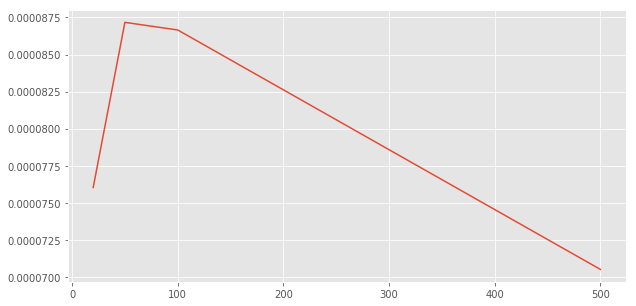

In [10]:
num_eps = [20,50,100,500]
errs = []

for eps in num_eps:
    model.reset_states()
    model = Sequential()
    model.add(LSTM(20, input_shape=(1,1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='sgd')
    model.fit(X_train, Y_train, epochs=eps, verbose=1)
    
    e = model.evaluate(X_test, Y_test, verbose=0)
    errs.append(e)
    print("Least squared error on test data for " + str(eps) + " epochs = " + str(e))

plt.plot(num_eps, errs)
plt.show()


Now, lets try adding another hidden layer of 20 LSTMs into the mix. 

In [11]:
model.reset_states()
model = Sequential()
model.add(LSTM(20, input_shape=(1,1), return_sequences=True))
model.add(LSTM(20))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='sgd')
model.fit(X_train, Y_train, epochs=100, verbose=1)

e = model.evaluate(X_test, Y_test, verbose=0)
print("Least squared error on test data for another layer of LSTM units: " + str(e))

Epoch 1/100
14717/14717 [==============================] - 2s 148us/step - loss: 0.0834
Epoch 2/100
14717/14717 [==============================] - 1s 95us/step - loss: 0.0800
Epoch 3/100
14717/14717 [==============================] - 1s 94us/step - loss: 0.0791
Epoch 4/100
14717/14717 [==============================] - 1s 94us/step - loss: 0.0781
Epoch 5/100
14717/14717 [==============================] - 1s 95us/step - loss: 0.0772
Epoch 6/100
14717/14717 [==============================] - 1s 94us/step - loss: 0.0761
Epoch 7/100
14717/14717 [==============================] - 1s 94us/step - loss: 0.0748
Epoch 8/100
14717/14717 [==============================] - 1s 97us/step - loss: 0.0735
Epoch 9/100
14717/14717 [==============================] - 1s 96us/step - loss: 0.0719
Epoch 10/100
14717/14717 [==============================] - 1s 98us/step - loss: 0.0700
Epoch 11/100
14717/14717 [==============================] - 1s 96us/step - loss: 0.0679
Epoch 12/100
14717/14717 [==============

14717/14717 [==============================] - 1s 94us/step - loss: 5.3332e-05
Epoch 91/100
14717/14717 [==============================] - 1s 92us/step - loss: 5.3046e-05
Epoch 92/100
14717/14717 [==============================] - 1s 91us/step - loss: 5.2814e-05
Epoch 93/100
14717/14717 [==============================] - 1s 89us/step - loss: 5.2554e-05
Epoch 94/100
14717/14717 [==============================] - 1s 91us/step - loss: 5.2308e-05
Epoch 95/100
14717/14717 [==============================] - 1s 92us/step - loss: 5.2050e-05
Epoch 96/100
14717/14717 [==============================] - 1s 92us/step - loss: 5.1807e-05
Epoch 97/100
14717/14717 [==============================] - 1s 90us/step - loss: 5.1560e-05
Epoch 98/100
14717/14717 [==============================] - 1s 91us/step - loss: 5.1312e-05
Epoch 99/100
14717/14717 [==============================] - 1s 92us/step - loss: 5.1070e-05
Epoch 100/100
14717/14717 [==============================] - 1s 92us/step - loss: 5.0815e-05


## References

1. [LSTM Explanation from Shi Yan](https://medium.com/mlreview/understanding-lstm-and-its-diagrams-37e2f46f1714)
2. [Keras](https://keras.io/)
3. [Yahoo! Finance S&P 500 Index Historical Data](https://finance.yahoo.com/quote/%5EGSPC/history/)
4. [Data Preparation](https://machinelearningmastery.com/prepare-univariate-time-series-data-long-short-term-memory-networks/)
5. [More info on Time Series with LSTM](https://towardsdatascience.com/using-lstms-to-forecast-time-series-4ab688386b1f)